In [ ]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

# If you want the exact same dataset as the YouTube video,
# use this link: https://drive.google.com/file/d/1WLm1AEYgU28Nk4lY4zNkGPSctdImbhJI/view?usp=sharing

In [2]:
import pandas as pd

df = pd.read_csv('MSFT_data.csv')

df

,Date,Close
0,1986-03-13,0.059707
1,1986-03-17,0.062906
2,1986-03-18,0.061306
3,1986-03-19,0.060240
4,1986-03-20,0.058641
...,...,...
9521,2023-12-22,371.055725
9522,2023-12-26,371.134949
9523,2023-12-27,370.550568
9524,2023-12-28,371.749115


In [3]:
df = df[['Date', 'Close']]

df

,Date,Close
0,1986-03-13,0.059707
1,1986-03-17,0.062906
2,1986-03-18,0.061306
3,1986-03-19,0.060240
4,1986-03-20,0.058641
...,...,...
9521,2023-12-22,371.055725
9522,2023-12-26,371.134949
9523,2023-12-27,370.550568
9524,2023-12-28,371.749115


In [4]:
df['Date']

,Date
0,1986-03-13
1,1986-03-17
2,1986-03-18
3,1986-03-19
4,1986-03-20
...,...
9521,2023-12-22
9522,2023-12-26
9523,2023-12-27
9524,2023-12-28


In [5]:
import datetime
#spremenim stringe v stevilke
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [6]:
df

,Date,Close
0,1986-03-13,0.059707
1,1986-03-17,0.062906
2,1986-03-18,0.061306
3,1986-03-19,0.060240
4,1986-03-20,0.058641
...,...,...
9521,2023-12-22,371.055725
9522,2023-12-26,371.134949
9523,2023-12-27,370.550568
9524,2023-12-28,371.749115


In [7]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

,Date
0,1986-03-13
1,1986-03-17
2,1986-03-18
3,1986-03-19
4,1986-03-20
...,...
9521,2023-12-22
9522,2023-12-26
9523,2023-12-27
9524,2023-12-28


In [8]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.059707
1986-03-17,0.062906
1986-03-18,0.061306
1986-03-19,0.060240
1986-03-20,0.058641
...,...
2023-12-22,371.055725
2023-12-26,371.134949
2023-12-27,370.550568


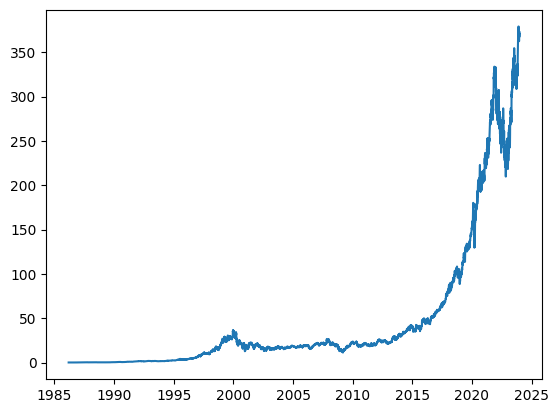

In [9]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [10]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2022-03-23',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,228.180054,229.717453,227.667603,224.650833
1,2021-03-26,229.717453,227.667603,224.650833,228.653854
2,2021-03-29,227.667603,224.650833,228.653854,227.454895
3,2021-03-30,224.650833,228.653854,227.454895,224.177063
4,2021-03-31,228.653854,227.454895,224.177063,227.967331
...,...,...,...,...,...
247,2022-03-17,269.468597,279.908508,286.965912,287.774994
248,2022-03-18,279.908508,286.965912,287.774994,292.853577
249,2022-03-21,286.965912,287.774994,292.853577,291.615631
250,2022-03-22,287.774994,292.853577,291.615631,296.392059


In [11]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

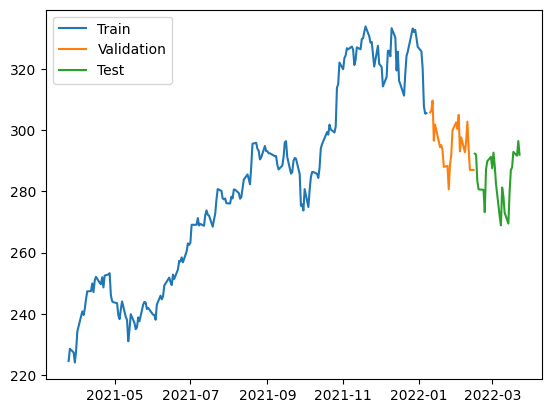

In [12]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 78636.2109 - mean_absolute_error: 278.7133 - val_loss: 87267.4219 - val_mean_absolute_error: 295.3258
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 79614.2656 - mean_absolute_error: 280.4924 - val_loss: 86985.1875 - val_mean_absolute_error: 294.8475
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 78951.5469 - mean_absolute_error: 279.2069 - val_loss: 86645.2188 - val_mean_absolute_error: 294.2704
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 77420.3516 - mean_absolute_error: 276.5418 - val_loss: 86244.7188 - val_mean_absolute_error: 293.5891
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 79620.5625 - mean_absolute_error: 280.4304 - val_loss: 85772.7891 - val_mean_absolute_error: 292.7843
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 77729.2266 - mean_absolute_error: 276.9945 - val_loss: 85109.2422 - val_mean_absolute_error: 291.6489
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


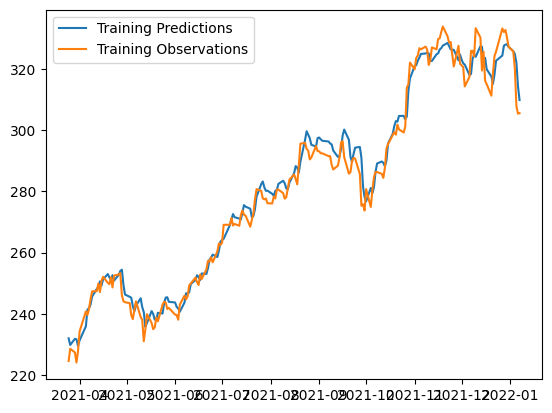

In [14]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

Epoch 1/100
7/7 - 5s - 767ms/step - loss: 0.3202 - mean_absolute_error: 0.4904 - val_loss: 0.3296 - val_mean_absolute_error: 0.5706
Epoch 2/100
7/7 - 1s - 99ms/step - loss: 0.2261 - mean_absolute_error: 0.3984 - val_loss: 0.1802 - val_mean_absolute_error: 0.4201
Epoch 3/100
7/7 - 0s - 25ms/step - loss: 0.1024 - mean_absolute_error: 0.2543 - val_loss: 0.0215 - val_mean_absolute_error: 0.1348
Epoch 4/100
7/7 - 0s - 19ms/step - loss: 0.0309 - mean_absolute_error: 0.1483 - val_loss: 0.0288 - val_mean_absolute_error: 0.1597
Epoch 5/100
7/7 - 0s - 21ms/step - loss: 0.0362 - mean_absolute_error: 0.1621 - val_loss: 0.0038 - val_mean_absolute_error: 0.0501
Epoch 6/100
7/7 - 0s - 20ms/step - loss: 0.0235 - mean_absolute_error: 0.1303 - val_loss: 0.0115 - val_mean_absolute_error: 0.0924
Epoch 7/100
7/7 - 0s - 20ms/step - loss: 0.0195 - mean_absolute_error: 0.1161 - val_loss: 0.0033 - val_mean_absolute_error: 0.0490
Epoch 8/100
7/7 - 0s - 43ms/step - loss: 0.0119 - mean_absolute_error: 0.0895 - va

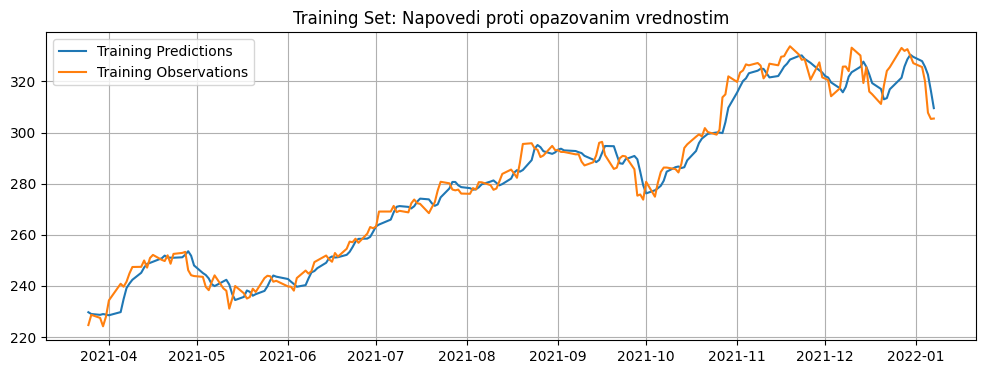

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


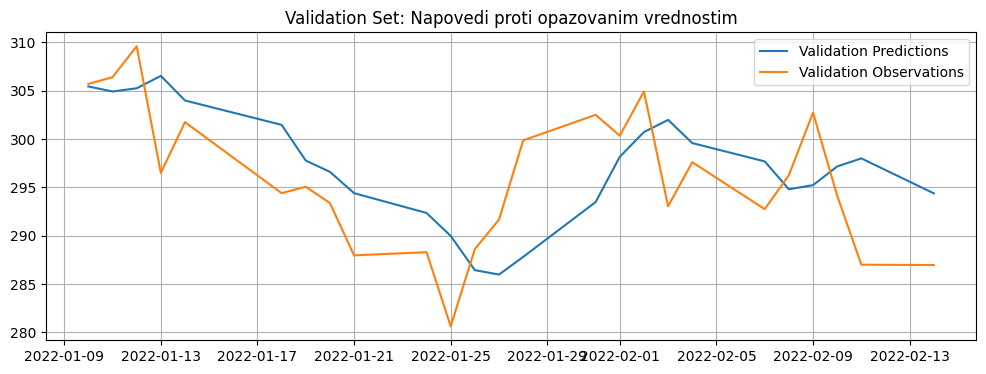

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


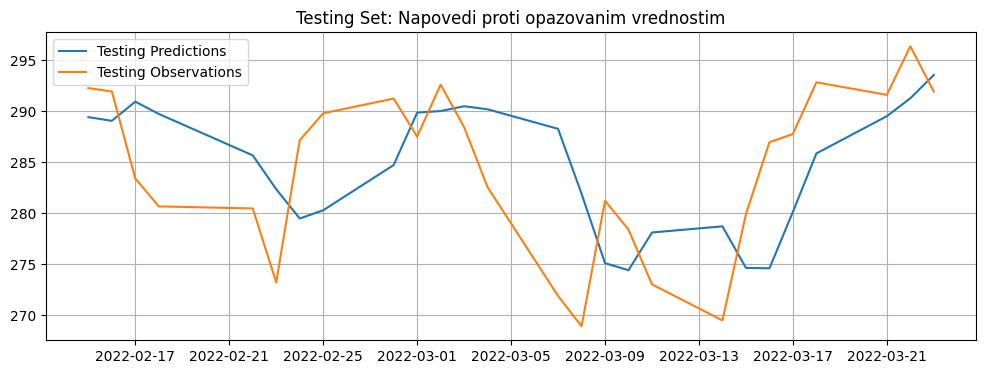

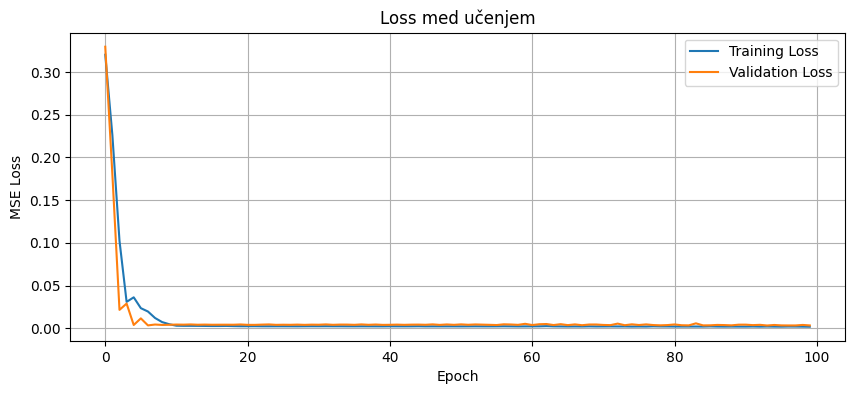

Min y_train: 224.17706
Max y_train: 333.76715
Povprečje y_train: 280.7321
Standardni odklon y_train: 31.330114
Napoved: 229.68 | Dejanska: 224.65
Napoved: 228.97 | Dejanska: 228.65
Napoved: 228.65 | Dejanska: 227.45
Napoved: 228.96 | Dejanska: 224.18
Napoved: 228.76 | Dejanska: 227.97
Napoved: 228.49 | Dejanska: 234.33
Napoved: 229.73 | Dejanska: 240.83
Napoved: 234.79 | Dejanska: 239.66
Napoved: 239.13 | Dejanska: 241.63
Napoved: 240.90 | Dejanska: 244.87


In [45]:
# === Okno 1: LSTM → Conv1D → LSTM ===
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

model1 = Sequential([
    layers.Input(shape=(X_train.shape[1], X_train.shape[2])),  # (3,1)
    layers.LSTM(64, return_sequences=True),
    layers.Conv1D(32, kernel_size=2, activation='relu'),
    layers.LSTM(64),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model1.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.001),
    metrics=['mean_absolute_error']
)

# Oblikovanje vhodov za skalerje
X_train_reshaped = X_train.reshape(-1, 1)
X_val_reshaped = X_val.reshape(-1, 1)
X_test_reshaped = X_test.reshape(-1, 1)

# Inicializacija skalerjev
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fitiraj samo na treningu
scaler_X.fit(X_train_reshaped)
scaler_y.fit(y_train.reshape(-1, 1))

# Transformiraj vhodne in ciljne podatke
X_train_scaled = scaler_X.transform(X_train_reshaped).reshape(X_train.shape)
X_val_scaled   = scaler_X.transform(X_val_reshaped).reshape(X_val.shape)
X_test_scaled  = scaler_X.transform(X_test_reshaped).reshape(X_test.shape)

y_train_scaled = scaler_y.transform(y_train.reshape(-1, 1)).flatten()
y_val_scaled   = scaler_y.transform(y_val.reshape(-1, 1)).flatten()
y_test_scaled  = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

history1 = model1.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_val_scaled, y_val_scaled),
    epochs=100,
    verbose=2
)


# Napovedi na treining podatkih
train_pred_scaled = model1.predict(X_train_scaled).flatten()
train_predictions = scaler_y.inverse_transform(train_pred_scaled.reshape(-1, 1)).flatten()

plt.figure(figsize=(12, 4))
plt.plot(dates_train, train_predictions, label='Training Predictions')
plt.plot(dates_train, y_train, label='Training Observations')
plt.title('Training Set: Napovedi proti opazovanim vrednostim')
plt.legend()
plt.grid(True)
plt.show()

# Napovedi na validacijskih podatkih
val_pred_scaled = model1.predict(X_val_scaled).flatten()
val_predictions = scaler_y.inverse_transform(val_pred_scaled.reshape(-1, 1)).flatten()

plt.figure(figsize=(12, 4))
plt.plot(dates_val, val_predictions, label='Validation Predictions')
plt.plot(dates_val, y_val, label='Validation Observations')
plt.title('Validation Set: Napovedi proti opazovanim vrednostim')
plt.legend()
plt.grid(True)
plt.show()

# Napovedi na testnih podatkih
test_pred_scaled = model1.predict(X_test_scaled).flatten()
test_predictions = scaler_y.inverse_transform(test_pred_scaled.reshape(-1, 1)).flatten()

plt.figure(figsize=(12, 4))
plt.plot(dates_test, test_predictions, label='Testing Predictions')
plt.plot(dates_test, y_test, label='Testing Observations')
plt.title('Testing Set: Napovedi proti opazovanim vrednostim')
plt.legend()
plt.grid(True)
plt.show()

# Izris izgube učenja
plt.figure(figsize=(10, 4))
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Loss med učenjem')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

print("Min y_train:", np.min(y_train))
print("Max y_train:", np.max(y_train))
print("Povprečje y_train:", np.mean(y_train))
print("Standardni odklon y_train:", np.std(y_train))

for i in range(10):
    print(f"Napoved: {train_predictions[i]:.2f} | Dejanska: {y_train[i]:.2f}")


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 3, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 2, 32)          │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 143,909 (562.15 KB)

 Trainable params: 47,969 (187.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 95,940 (374.77 KB)

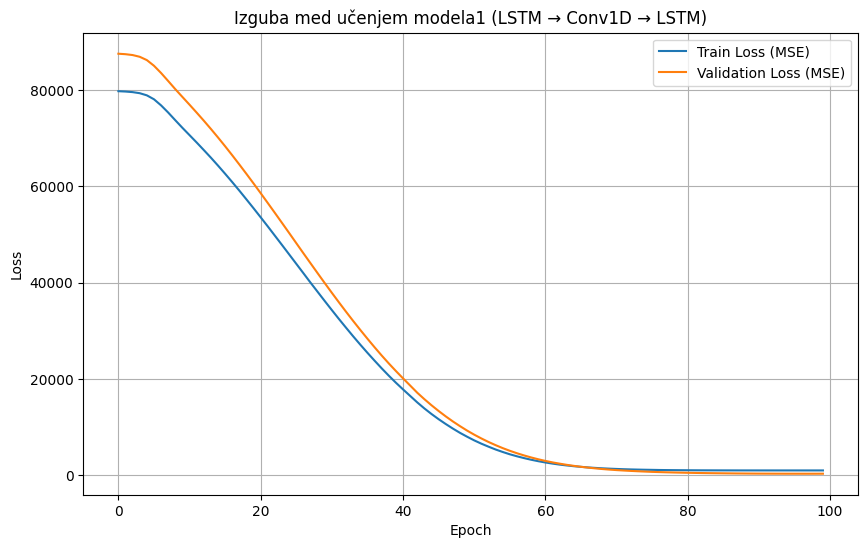

In [30]:
model1.summary()
# Vizualizacija izgube (loss) med učenjem
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(history1.history['loss'], label='Train Loss (MSE)')
plt.plot(history1.history['val_loss'], label='Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Izguba med učenjem modela1 (LSTM → Conv1D → LSTM)')
plt.legend()
plt.grid(True)
plt.show()


In [40]:
import numpy as np
from tensorflow.keras.models import load_model
import joblib

# === 1. Naloži model in skalerje ===

# === 2. Vhod: zadnje 3 vrednosti cene delnice (npr. realne vrednosti) ===
last_3_prices = np.array([261.12, 261.50, 266.82])  # nadomesti z aktualnimi podatki

# === 3. Preoblikuj in skaliraj vhodne podatke ===
X_input = last_3_prices.reshape(-1, 1)                         # v (3,1)
X_input_scaled = scaler_X.transform(X_input).reshape(1, 3, 1)  # v (1,3,1)

# === 4. Napoved in denormalizacija ===
y_pred_scaled = model1.predict(X_input_scaled)                 # skalirana napoved
y_pred = scaler_y.inverse_transform(y_pred_scaled)[0][0]      # realna vrednost

# === 5. Izpis ===
print(f"Napovedana cena delnice: {y_pred:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Napovedana cena delnice: 265.25


Epoch 1/100
7/7 - 3s - 457ms/step - loss: 0.2728 - mean_absolute_error: 0.4508 - val_loss: 0.2131 - val_mean_absolute_error: 0.4579
Epoch 2/100
7/7 - 0s - 42ms/step - loss: 0.1331 - mean_absolute_error: 0.2992 - val_loss: 0.0784 - val_mean_absolute_error: 0.2747
Epoch 3/100
7/7 - 0s - 19ms/step - loss: 0.0422 - mean_absolute_error: 0.1627 - val_loss: 0.0083 - val_mean_absolute_error: 0.0772
Epoch 4/100
7/7 - 0s - 20ms/step - loss: 0.0125 - mean_absolute_error: 0.0920 - val_loss: 0.0064 - val_mean_absolute_error: 0.0665
Epoch 5/100
7/7 - 0s - 42ms/step - loss: 0.0122 - mean_absolute_error: 0.0932 - val_loss: 0.0029 - val_mean_absolute_error: 0.0455
Epoch 6/100
7/7 - 0s - 20ms/step - loss: 0.0072 - mean_absolute_error: 0.0712 - val_loss: 0.0042 - val_mean_absolute_error: 0.0531
Epoch 7/100
7/7 - 0s - 21ms/step - loss: 0.0058 - mean_absolute_error: 0.0625 - val_loss: 0.0028 - val_mean_absolute_error: 0.0451
Epoch 8/100
7/7 - 0s - 20ms/step - loss: 0.0035 - mean_absolute_error: 0.0486 - va

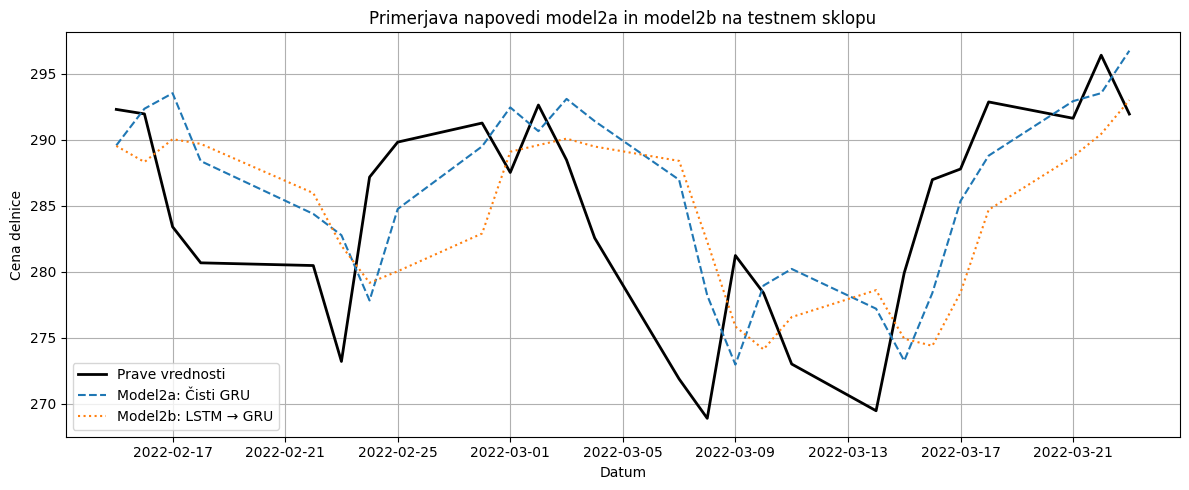

In [46]:
# === Okno 2: Čisti GRU in Hibrid LSTM → GRU s skaliranjem ===
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# 1. NORMALIZACIJA podatkov
# --------------------------------
# Preoblikuj 3D X v 2D za MinMaxScaler
X_train_flat = X_train.reshape(-1, 1)
X_val_flat   = X_val.reshape(-1, 1)
X_test_flat  = X_test.reshape(-1, 1)

# Inicializiraj skalerje
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Prilagodi (fit) samo na treningu
scaler_X.fit(X_train_flat)
scaler_y.fit(y_train.reshape(-1, 1))

# Pretvori podatke nazaj v 3D
X_train_scaled = scaler_X.transform(X_train_flat).reshape(X_train.shape)
X_val_scaled   = scaler_X.transform(X_val_flat).reshape(X_val.shape)
X_test_scaled  = scaler_X.transform(X_test_flat).reshape(X_test.shape)

# Skaliraj y vrednosti
y_train_scaled = scaler_y.transform(y_train.reshape(-1, 1)).flatten()
y_val_scaled   = scaler_y.transform(y_val.reshape(-1, 1)).flatten()
y_test_scaled  = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# 2. DEFINICIJA in UČENJE MODELOV
# --------------------------------
# 2a) Čisti GRU
model2a = Sequential([
    layers.Input(shape=(X_train.shape[1], X_train.shape[2])),
    layers.GRU(64),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])
model2a.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'])
history2a = model2a.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_val_scaled, y_val_scaled),
    epochs=100, verbose=2
)

# 2b) Hibrid LSTM → GRU
model2b = Sequential([
    layers.Input(shape=(X_train.shape[1], X_train.shape[2])),
    layers.LSTM(64, return_sequences=True),
    layers.GRU(64),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])
model2b.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'])
history2b = model2b.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_val_scaled, y_val_scaled),
    epochs=100, verbose=2
)

# 3. NAPOVEDI in DENORMALIZACIJA
# --------------------------------
# Napovedi (skalirane) na testnem sklopu
pred2a_scaled = model2a.predict(X_test_scaled).flatten()
pred2b_scaled = model2b.predict(X_test_scaled).flatten()

# Pretvori nazaj v originalne vrednosti
pred2a = scaler_y.inverse_transform(pred2a_scaled.reshape(-1,1)).flatten()
pred2b = scaler_y.inverse_transform(pred2b_scaled.reshape(-1,1)).flatten()

# 4. GRAFIČNI PRIKAZ
# --------------------------------
plt.figure(figsize=(12, 5))
plt.plot(dates_test, y_test,       label='Prave vrednosti', color='black', linewidth=2)
plt.plot(dates_test, pred2a,       label='Model2a: Čisti GRU', linestyle='--')
plt.plot(dates_test, pred2b,       label='Model2b: LSTM → GRU', linestyle=':')
plt.title('Primerjava napovedi model2a in model2b na testnem sklopu')
plt.xlabel('Datum')
plt.ylabel('Cena delnice')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Train 2021-03 → Test 2021-04: MAE_scaled = 3.6478
Train 2021-04 → Test 2021-05: MAE_scaled = 0.0933
Train 2021-05 → Test 2021-06: MAE_scaled = 0.2751
Train 2021-06 → Test 2021-07: MAE_scaled = 0.2161
Train 2021-07 → Test 2021-08: MAE_scaled = 0.1166
Train 2021-08 → Test 2021-09: MAE_scaled = 0.0742
Train 2021-09 → Test 2021-10: MAE_scaled = 0.0641
Train 2021-10 → Test 2021-11: MAE_scaled = 0.0593
Train 2021-11 → Test 2021-12: MAE_scaled = 0.0586
Train 2021-12 → Test 2022-01: MAE_scaled = 0.0805
Train 2022-01 → Test 2022-02: MAE_scaled = 0.0596
Train 2022-02 → Test 2022-03: MAE_scaled = 0.0607
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


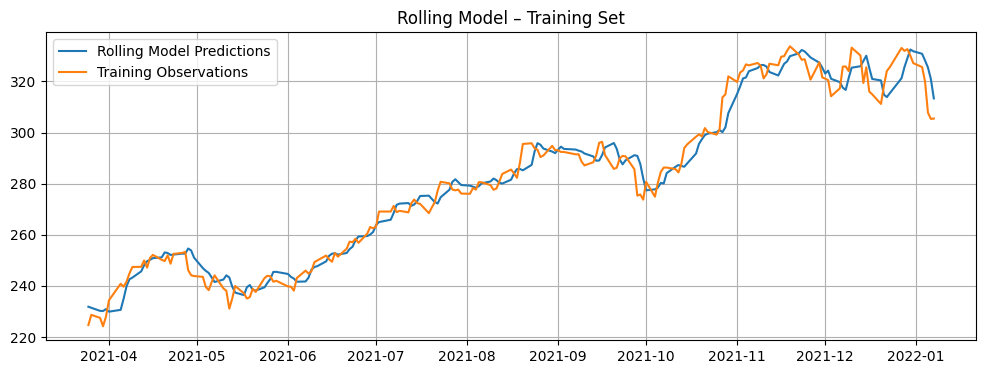

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


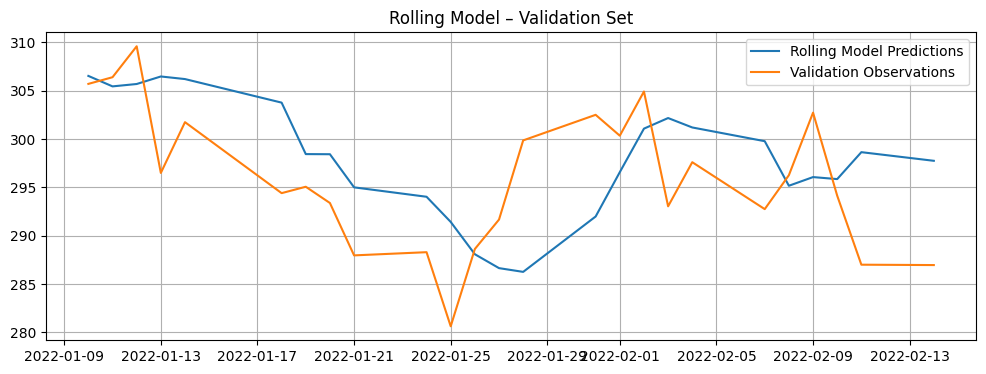

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


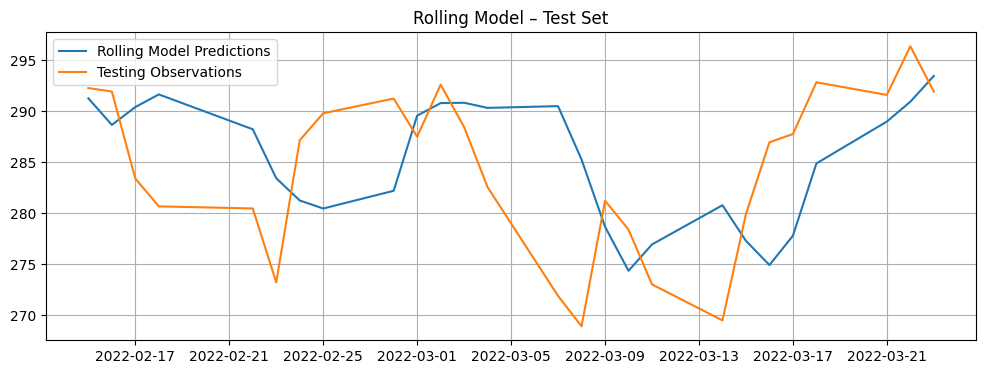

In [47]:
import pandas as pd
from tensorflow.keras.models import clone_model
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

months = pd.to_datetime(dates).to_period('M')
unique_months = sorted(months.unique())

results = []

for i in range(len(unique_months) - 1):
    train_month = unique_months[i]
    test_month  = unique_months[i + 1]

    # Indeksi za train in test
    train_idx = months <= train_month
    test_idx  = months == test_month

    X_tr, y_tr = X[train_idx], y[train_idx]
    X_te, y_te = X[test_idx], y[test_idx]

    # --- NOVO: fitiraj scaler samo na X_tr, y_tr ---
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()

    X_tr_flat = X_tr.reshape(-1, 1)
    X_te_flat = X_te.reshape(-1, 1)

    scaler_X.fit(X_tr_flat)
    scaler_y.fit(y_tr.reshape(-1, 1))

    X_tr_scaled = scaler_X.transform(X_tr_flat).reshape(X_tr.shape)
    X_te_scaled = scaler_X.transform(X_te_flat).reshape(X_te.shape)

    y_tr_scaled = scaler_y.transform(y_tr.reshape(-1, 1)).flatten()
    y_te_scaled = scaler_y.transform(y_te.reshape(-1, 1)).flatten()

    # Kloniraj in inicializiraj model iz nič (bolj resnično rolling)
    model_rolling = clone_model(model1)
    model_rolling.compile(
        loss='mse',
        optimizer=Adam(learning_rate=0.001),
        metrics=['mean_absolute_error']
    )

    # Treniraj na skaliranih podatkih
    model_rolling.fit(
        X_tr_scaled, y_tr_scaled,
        epochs=20,
        verbose=0
    )

    # Evaluiraj na skaliranih testnih podatkih
    loss, mae_scaled = model_rolling.evaluate(X_te_scaled, y_te_scaled, verbose=0)

    # Denormaliziraj MAE ali napoved, če želiš metriko v originalni enoti:
    # pred_te_scaled = model_rolling.predict(X_te_scaled)
    # pred_te = scaler_y.inverse_transform(pred_te_scaled)
    # mae = np.mean(np.abs(pred_te.flatten() - y_te))

    print(f"Train {train_month} → Test {test_month}: MAE_scaled = {mae_scaled:.4f}")
    results.append({
        'train_month': str(train_month),
        'test_month' : str(test_month),
        'mae_scaled' : mae_scaled
    })
# Po koncu zanke:
model_rolling_final = model_rolling

# 1) Napovedi na train množici
train_rolling_pred_scaled = model_rolling_final.predict(X_train_scaled).flatten()
train_rolling_pred = scaler_y.inverse_transform(train_rolling_pred_scaled.reshape(-1,1)).flatten()

plt.figure(figsize=(12,4))
plt.plot(dates_train, train_rolling_pred, label='Rolling Model Predictions')
plt.plot(dates_train, y_train,           label='Training Observations')
plt.title('Rolling Model – Training Set')
plt.legend()
plt.grid(True)
plt.show()

# 2) Napovedi na validation množici
val_rolling_pred_scaled = model_rolling_final.predict(X_val_scaled).flatten()
val_rolling_pred = scaler_y.inverse_transform(val_rolling_pred_scaled.reshape(-1,1)).flatten()

plt.figure(figsize=(12,4))
plt.plot(dates_val, val_rolling_pred, label='Rolling Model Predictions')
plt.plot(dates_val, y_val,           label='Validation Observations')
plt.title('Rolling Model – Validation Set')
plt.legend()
plt.grid(True)
plt.show()

# 3) Napovedi na test množici
test_rolling_pred_scaled = model_rolling_final.predict(X_test_scaled).flatten()
test_rolling_pred = scaler_y.inverse_transform(test_rolling_pred_scaled.reshape(-1,1)).flatten()

plt.figure(figsize=(12,4))
plt.plot(dates_test, test_rolling_pred, label='Rolling Model Predictions')
plt.plot(dates_test, y_test,           label='Testing Observations')
plt.title('Rolling Model – Test Set')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


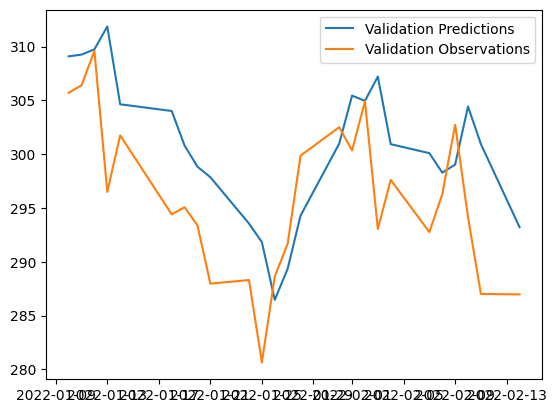

In [15]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


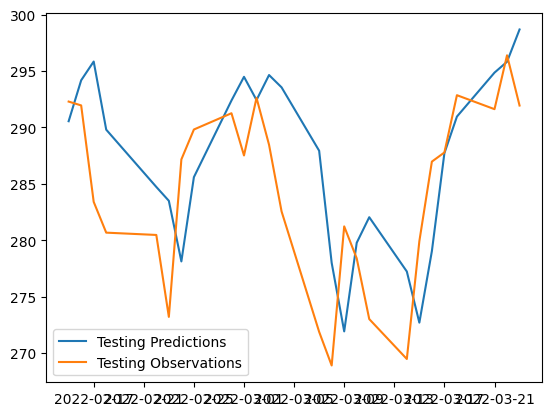

In [16]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


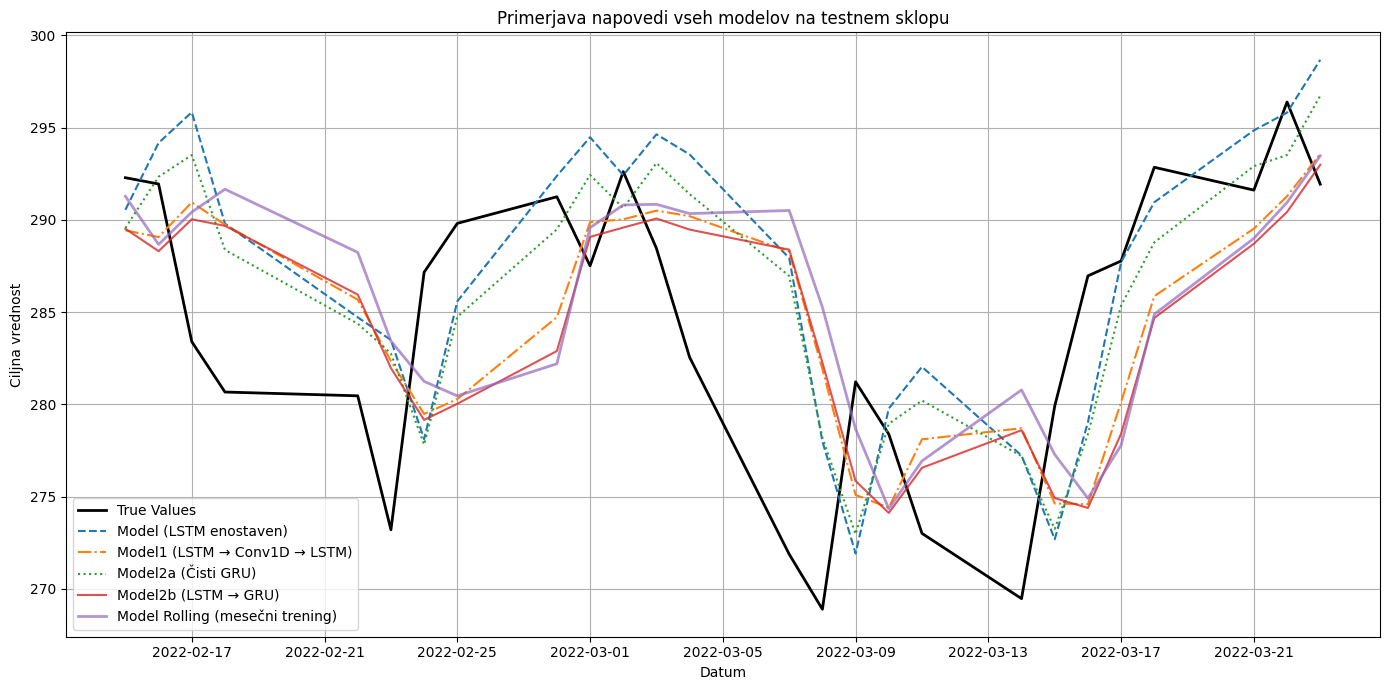

Model (LSTM enostaven)         MAE = 6.1204, MSE = 54.7916
Model1 (LSTM→Conv1D→LSTM)      MAE = 6.5433, MSE = 56.1247
Model2a (Čisti GRU)            MAE = 5.7615, MSE = 45.6713
Model2b (LSTM→GRU)             MAE = 6.6477, MSE = 58.5506
Model Rolling (mesečni trening) MAE = 6.8378, MSE = 67.7555

Najboljši model po MAE je: Model2a (Čisti GRU) (MAE = 5.7615)


In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Napovedi obeh modelov
test_predictions_model = model.predict(X_test).flatten()
#test_predictions_model1 = model1.predict(X_test).flatten()
#test_predictions_model2a  = model2a.predict(X_test).flatten()
#test_predictions_model2b  = model2b.predict(X_test).flatten()
# Napoved rolling modela (zadnji iz rolling treninga)
#test_predictions_rolling = model_rolling.predict(X_test).flatten()

# === Napoved iz modela1 (skalirana) ===
test_pred_model1_scaled = model1.predict(X_test_scaled).flatten()  # Uporabi skaliran vhod!
test_predictions_model1 = scaler_y.inverse_transform(test_pred_model1_scaled.reshape(-1, 1)).flatten()
# 3) Model2a (Čisti GRU), zdaj na skaliranih
test_pred2a_scaled = model2a.predict(X_test_scaled).flatten()
test_predictions_model2a = scaler_y.inverse_transform(test_pred2a_scaled.reshape(-1, 1)).flatten()
# 4) Model2b (LSTM → GRU), prav tako na skaliranih
test_pred2b_scaled = model2b.predict(X_test_scaled).flatten()
test_predictions_model2b = scaler_y.inverse_transform(test_pred2b_scaled.reshape(-1, 1)).flatten()

# 5) Rolling model (treniran na skaliranih podatkih)
test_pred_rolling_scaled = model_rolling.predict(X_test_scaled).flatten()
test_predictions_rolling = scaler_y.inverse_transform(test_pred_rolling_scaled.reshape(-1, 1)).flatten()
# Risanje obeh napovedi + dejanske vrednosti
plt.figure(figsize=(14, 7))

# Prava vrednost
plt.plot(dates_test, y_test, label='True Values', color='black', linewidth=2)

plt.plot(dates_test, test_predictions_model,   label='Model (LSTM enostaven)', linestyle='--')
plt.plot(dates_test, test_predictions_model1,  label='Model1 (LSTM → Conv1D → LSTM)', linestyle='-.')
plt.plot(dates_test, test_predictions_model2a, label='Model2a (Čisti GRU)', linestyle=':')
plt.plot(dates_test, test_predictions_model2b, label='Model2b (LSTM → GRU)', linestyle='solid', alpha=0.8)
plt.plot(dates_test, test_predictions_rolling, label='Model Rolling (mesečni trening)', linestyle='-', linewidth=2, alpha=0.7)

plt.legend()
plt.title('Primerjava napovedi vseh modelov na testnem sklopu')
plt.xlabel('Datum')
plt.ylabel('Ciljna vrednost')
plt.grid(True)
plt.tight_layout()
plt.show()

# Pretvori v numpy array, če še ni
y_true = np.array(y_test)

# 1) Enostaven LSTM (model)
y_pred_model    = np.array(test_predictions_model)
# 2) model1
y_pred_model1   = np.array(test_predictions_model1)
# 3) model2a
y_pred_model2a  = np.array(test_predictions_model2a)
# 4) model2b
y_pred_model2b  = np.array(test_predictions_model2b)
# 5) rolling model
y_pred_rolling  = np.array(test_predictions_rolling)

# Funkcija za izpis metrike
def print_metrics(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    print(f"{name:30s} MAE = {mae:.4f}, MSE = {mse:.4f}")
    return mae

# Izračunaj za vse
mae_model    = print_metrics('Model (LSTM enostaven)',       y_true, y_pred_model)
mae_model1   = print_metrics('Model1 (LSTM→Conv1D→LSTM)',    y_true, y_pred_model1)
mae_model2a  = print_metrics('Model2a (Čisti GRU)',          y_true, y_pred_model2a)
mae_model2b  = print_metrics('Model2b (LSTM→GRU)',          y_true, y_pred_model2b)
mae_rolling  = print_metrics('Model Rolling (mesečni trening)', y_true, y_pred_rolling)

# Kateri model ima najmanjši MAE?
mae_values = {
    'Model (LSTM enostaven)'       : mae_model,
    'Model1 (LSTM→Conv1D→LSTM)'    : mae_model1,
    'Model2a (Čisti GRU)'          : mae_model2a,
    'Model2b (LSTM→GRU)'           : mae_model2b,
    'Model Rolling (mesečni trening)': mae_rolling
}

best_model = min(mae_values, key=mae_values.get)
print(f"\nNajboljši model po MAE je: {best_model} (MAE = {mae_values[best_model]:.4f})")

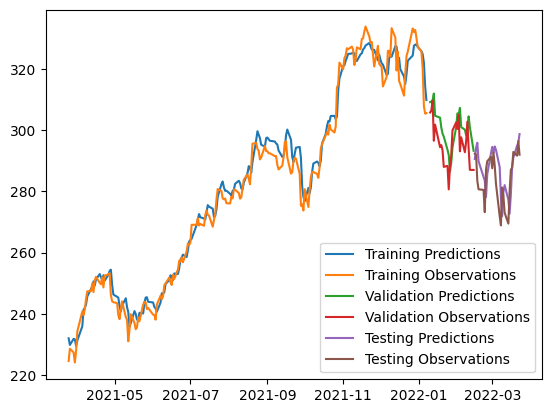

In [17]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [18]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━

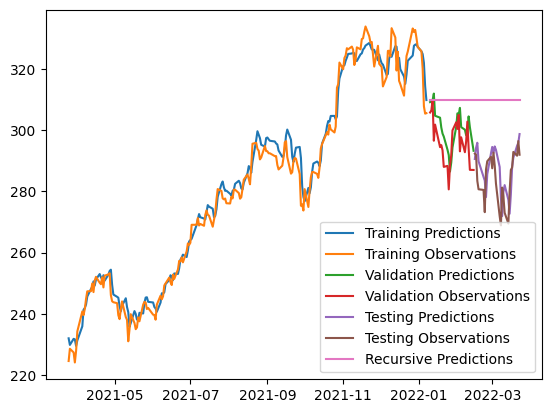

In [19]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])

In [20]:
import numpy as np
#may 18,2022
#prava cena 254.08
# Zadnje tri cene delnice (vstavi dejanske vrednosti)
last_3_values = np.array([261.12, 261.50, 266.82])  # Te vrednosti so samo primer

# Preoblikujemo podatke v obliko, ki jo model pričakuje: (1, 3, 1)
# To pomeni: 1 primer, 3 mesečne cene, 1 značilnost (cena delnice)
last_3_values = last_3_values.reshape((1, 3, 1))

# Napoved prihodnje cene (napovedujemo naslednji mesec)
predicted_value = model.predict(last_3_values)

# Izpišemo napovedano ceno
print(f"Napovedana cena delnice v naslednjem mesecu je: {predicted_value[0][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Napovedana cena delnice v naslednjem mesecu je: 266.7882080078125


In [39]:
import numpy as np

# Vhodni podatki - zadnje 3 cene delnice
last_3_values = np.array([261.12, 261.50, 266.82]).reshape((1, 3, 1))

# Seznam modelov z imeni (da lepše izpišeš)
models = {
    "Model (enostaven LSTM)": model,
    "Model1 (LSTM → Conv1D → LSTM)": model1,
    "Model2a (Čisti GRU)": model2a,
    "Model2b (LSTM → GRU)": model2b,
    # Če imaš tudi rolling model:
    "Model Rolling (mesečni trening)": model_rolling
}

# Napoved za vsak model in izpis
for name, mdl in models.items():
    pred = mdl.predict(last_3_values)
    print(f"{name} napoved: {pred[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Model (enostaven LSTM) napoved: 266.79
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Model1 (LSTM → Conv1D → LSTM) napoved: 4.06
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Model2a (Čisti GRU) napoved: 271.06
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Model2b (LSTM → GRU) napoved: 280.49
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Model Rolling (mesečni trening) napoved: 271.19


In [29]:
import numpy as np

# Vhodni podatki - zadnje 3 cene delnice
last_3_values = np.array([231.12, 231.50, 236.82]).reshape((1, 3, 1))

# Seznam modelov z imeni (da lepše izpišeš)
models = {
    "Model (enostaven LSTM)": model,
    "Model1 (LSTM → Conv1D → LSTM)": model1,
    "Model2a (Čisti GRU)": model2a,
    "Model2b (LSTM → GRU)": model2b,
    # Če imaš tudi rolling model:
    "Model Rolling (mesečni trening)": model_rolling
}

# Napoved za vsak model in izpis
for name, mdl in models.items():
    pred = mdl.predict(last_3_values)
    print(f"{name} napoved: {pred[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Model (enostaven LSTM) napoved: 238.24
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Model1 (LSTM → Conv1D → LSTM) napoved: 280.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Model2a (Čisti GRU) napoved: 271.06
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Model2b (LSTM → GRU) napoved: 280.49
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Model Rolling (mesečni trening) napoved: 262.14
